In [1]:
import pickle
import z_update_layer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import tensorflow as tf
import tensorflow.keras.optimizers


In [2]:
import pickle
with open("/home/richertlr/Documents/summer2019/cifar-10-batches-py/data_batch_1",'rb') as fo:
    dict=pickle.load(fo,encoding="bytes")

In [3]:
with open("/home/richertlr/Documents/summer2019/cifar-10-batches-py/test_batch","rb") as fo2:
    dict2=pickle.load(fo2,encoding="bytes")

In [4]:
temp = np.reshape(dict[b'data']/255,[10000,3,32,32])
x_input = np.transpose(temp,(0,2,3,1)) - 0.5
temp = np.reshape(dict2[b'data']/255,[-1,3,32,32])
x_val = np.transpose(temp,(0,2,3,1)) - 0.5

In [5]:
labels = to_categorical(dict[b'labels'])
labels_val = to_categorical(dict2[b'labels'])

In [6]:
#model = Sequential()
#model.add(z_update_layer.multilayerADMMsparseCodingTightFrame([32,32],[[5,5],[4,4]],[[2,2]],1.,.2,24,input_shape=(None,32,32,3)))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(Flatten())
#model.add(Dense(10,activation='softmax'))

In [7]:
#inputLayer = tensorflow.keras.Input(shape=(32,32,3))
#x,reconInputLayer = z_update_layer.multilayerADMMsparseCodingTightFrame([32,32],[[5,5],[4,4]],[[2,2]],1.,.2,5)(inputLayer)
#x2 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x)
#x3 = tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu')(x2)
#x4 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x3)
#x5 = tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu')(x4)
#x6 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x5)
#x7 = tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu')(x6)
#x8 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x7)
#x9 = Flatten()(x8)
#y = Dense(10,activation='softmax')(x9)

#model = Model(inputs=inputLayer,outputs=y)
#model.add_loss(0.00001*z_update_layer.cropped_l2_loss(inputLayer,reconInputLayer))

In [6]:
lambduh=0.2
rho = 1.
noi=10
inputLayer = tensorflow.keras.Input(shape=(32,32,3))
x,reconInputLayer = z_update_layer.multilayerADMMsparseCodingTightFrame([32,32],[[5,5],[5,5]],[[2,2]],rho,lambduh,noi)(inputLayer)
croppedRecon = tensorflow.keras.layers.Cropping2D(([13,13],[13,13]))(reconInputLayer)
model = Model(inputs=inputLayer,outputs=croppedRecon)
model.add_loss(tf.losses.absolute_difference(
    tensorflow.fill(dims=tensorflow.shape(x),value=0.),
    x,
    weights=2*lambduh
))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
lambduh=0.2
rho = 1.
noi=20
inputLayer = tensorflow.keras.Input(shape=(32,32,3))
x,reconInputLayer = z_update_layer.multilayerADMMsparseCodingTightFrame([64],[[14,14]],[],rho,lambduh,noi)(inputLayer)
croppedRecon = tensorflow.keras.layers.Cropping2D(([13,13],[13,13]))(reconInputLayer)
model = Model(inputs=inputLayer,outputs=croppedRecon)
model.add_loss(tf.losses.absolute_difference(
    tensorflow.fill(dims=tensorflow.shape(x),value=0.),
    x,
    weights=2*lambduh
))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
lambduh = 0.2
rho = 1.
minimums = []
maximums = []
medians = []
stdevs = []


for noi in range(1,12):
    tempMax = []
    tempMin = []
    tempMedian = []
    tempstd = []
    for trial in range(20):
        inputLayer = tensorflow.keras.Input(shape=(32,32,3))
        x,reconInputLayer = z_update_layer.multilayerADMMsparseCodingTightFrame([32,32],[[5,5],[5,5]],[[2,2]],rho,lambduh,noi)(inputLayer)
        croppedRecon = tensorflow.keras.layers.Cropping2D(([13,13],[13,13]))(reconInputLayer)
        model = Model(inputs=inputLayer,outputs=croppedRecon)
        initialOutputs = model.predict(x_input[0:1])
        tempMax.append(np.amax(initialOutputs))
        tempMin.append(np.amin(initialOutputs))
        tempMedian.append(np.median(initialOutputs))
        tempstd.append(np.std(initialOutputs))
    minimums.append(tempMin)
    maximums.append(tempMax)
    medians.append(tempMedian)
    stdevs.append(tempstd)
        

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
quartFstd = []
medstd = []
quartLstd = []
quartFmin = []
medMin = []
quartLmin = []
quartFmed = []
medMed = []
quartLmed = []
quartFmax = []
medMax = []
quartLmax = []
for noi in range(1,12):
    temp = np.sort(minimums[noi - 1])
    quartFmin.append((temp[4] + temp[5])/2)
    medMin.append((temp[9]+temp[10])/2)
    quartLmin.append((temp[14]+temp[15])/2)
    temp = np.sort(medians[noi - 1])
    quartFmed.append((temp[4]+temp[5])/2)
    medMed.append((temp[9]+temp[10])/2)
    quartLmed.append((temp[14]+temp[15])/2)
    temp = np.sort(maximums[noi - 1])
    quartFmax.append((temp[4] +temp[5])/2)
    medMax.append((temp[9] + temp[10])/2)
    quartLmax.append((temp[14] + temp[15])/2)
    temp = np.sort(stdevs[noi - 1])
    quartFstd.append((temp[4] + temp[5])/2)
    medstd.append((temp[9]+temp[10])/2)
    quartLstd.append((temp[14]+temp[15])/2)


In [8]:
print(quartFmin)
print(quartFmax)
print(quartFmed)
print(quartFstd)

[-1.0619746446609497, -1.2219915390014648, -1.7468633651733398, -2.5823278427124023, -6.110897064208984, -14.932379722595215, -34.14698028564453, -100.54689025878906, -351.33197021484375, -674.5595703125, -2560.662109375]
[0.8969855308532715, 0.8810876607894897, 1.0574710369110107, 1.3780879974365234, 2.2469139099121094, 3.8449976444244385, 11.298110961914062, 35.969337463378906, 100.94070434570312, 196.73341369628906, 708.2471923828125]
[-0.19821180403232574, -0.22908054292201996, -0.22522835433483124, -0.2295076847076416, -0.1774284541606903, -0.2874906659126282, -0.4559248685836792, -0.36134737730026245, -0.8643116354942322, -0.759280264377594, -2.48488450050354]
[0.332471638917923, 0.31088143587112427, 0.342488557100296, 0.41697168350219727, 0.5698671936988831, 0.7334985733032227, 2.083766460418701, 5.681931018829346, 13.23161506652832, 29.780479431152344, 101.71781921386719]


In [9]:
print(medMin)
print(medMax)
print(medMed)
print(medstd)

[-0.9758234620094299, -0.9961032867431641, -1.261800765991211, -2.0094377994537354, -4.170244216918945, -8.36444091796875, -26.450115203857422, -66.50301361083984, -248.53729248046875, -469.6617431640625, -1457.5419921875]
[0.9647727608680725, 1.0002293586730957, 1.2185335159301758, 1.7619194984436035, 2.8279623985290527, 5.455416679382324, 14.660928726196289, 45.18980407714844, 165.14739990234375, 327.0360107421875, 1028.55712890625]
[-0.18299128115177155, -0.16742002964019775, -0.16616255044937134, -0.1764334887266159, -0.16254879534244537, -0.2198832780122757, -0.26671165227890015, -0.17830047011375427, -0.2351047396659851, -0.1789356917142868, -0.19828978180885315]
[0.34726426005363464, 0.34457072615623474, 0.3925358057022095, 0.49199050664901733, 0.6473621129989624, 1.1197795867919922, 3.018239736557007, 6.586889266967773, 20.75518798828125, 47.073455810546875, 146.82449340820312]


In [10]:
print(quartLmin)
print(quartLmax)
print(quartLmed)
print(quartLstd)

[-0.8807051181793213, -0.9214560985565186, -1.163128137588501, -1.7767268419265747, -3.4531266689300537, -5.350549697875977, -18.054061889648438, -49.8358039855957, -131.15550231933594, -286.30938720703125, -1142.06591796875]
[1.0394229888916016, 1.2652112245559692, 1.3838162422180176, 2.4586195945739746, 3.3657689094543457, 11.439735412597656, 16.978431701660156, 60.7996826171875, 215.72740173339844, 488.5185852050781, 2310.75732421875]
[-0.14511236548423767, -0.11556027084589005, -0.12435080856084824, -0.1426704078912735, -0.1443648487329483, -0.11802975833415985, -0.16839715838432312, -0.08781255781650543, -0.09518122673034668, 0.017559897154569626, 0.02478434517979622]
[0.3754858374595642, 0.3861461877822876, 0.44604894518852234, 0.6826927065849304, 0.8985545635223389, 1.9557924270629883, 4.012731075286865, 9.530078887939453, 32.15163803100586, 73.0474853515625, 317.806396484375]


In [11]:
for ii in range(1,19):
    print(medMax[ii]/medMax[ii - 1])

0.9202021851496294
1.3837883151606183
1.2539112219147064
2.193285837155059
1.7567143053660281
2.862143872905973
3.365740294863744
2.3693482615411336
4.218430539941668
2.20437615041241
4.4693123726880755
3.9350793121163936
4.212556617694232
0.8891346761472644
7.311233333327243
4.354103030219428
1.9772710284218666
4.315877881002322


In [8]:
reconInputLayer.get_shape().as_list()

[None, 58, 58, 3]

In [7]:
initialOutputs = model.predict(x_input[0:1])
didItRun = "I hope so"

In [8]:
initialOutputs.shape

(1, 32, 32, 3)

In [9]:
print(np.amax(initialOutputs))
print(np.amin(initialOutputs))

6.5636725
-1.1274283


In [7]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=0.000125, momentum=0.7, nesterov=True)
model.compile(optimizer='sgd', loss='mse')
model.fit(x_input, x_input, epochs=10, batch_size=32, validation_data=(x_val,x_val))

Train on 10000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
10000/10000 [==============================] - 6995s 700ms/sample - loss: 0.0163 - val_loss: 0.0112
Epoch 2/10
10000/10000 [==============================] - 6986s 699ms/sample - loss: 0.0096 - val_loss: 0.0084
Epoch 3/10
10000/10000 [==============================] - 6987s 699ms/sample - loss: 0.0076 - val_loss: 0.0069
Epoch 4/10
10000/10000 [==============================] - 6992s 699ms/sample - loss: 0.0065 - val_loss: 0.0060
Epoch 5/10
10000/10000 [==============================] - 6988s 699ms/sample - loss: 0.0056 - val_loss: 0.0053
Epoch 6/10
10000/10000 [==============================] - 6989s 699ms/sample - loss: 0.0050 - val_loss: 0.0047
Epoch 7/10
10000/10000 [==============================] - 6988s 699ms/sample - loss: 0.0045 - val_loss: 0.0043
Epoch 8/10
 9984/10000 [=======================

KeyboardInterrupt: 

(1, 32, 32, 3)
(1, 32, 32, 3)


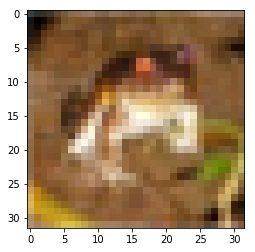

In [8]:
reconModel = Model(inputLayer,reconInputLayer)
input_image = np.reshape(x_input[0],(1,32,32,3))
print(input_image.shape)
output_image = reconModel.predict(input_image)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

theImage = (input_image - np.amin(input_image))/(np.amax(input_image) - np.amin(input_image))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)

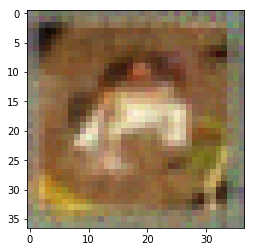

In [10]:
            
theImage =  (output_image - np.amin(output_image))/(np.amax(output_image) - np.amin(output_image))

newImage = np.squeeze(theImage)

plt.imshow(newImage[11:48,11:48,:])
#plt.imshow(newImage)

(1, 32, 32, 3)
(1, 32, 32, 3)


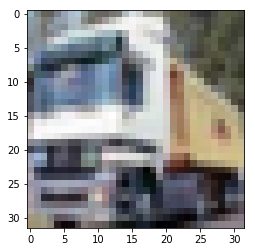

In [11]:
reconModel = Model(inputLayer,reconInputLayer)
input_image = np.reshape(x_input[1],(1,32,32,3))
print(input_image.shape)
output_image = reconModel.predict(input_image)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

theImage = (input_image - np.amin(input_image))/(np.amax(input_image) - np.amin(input_image))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)

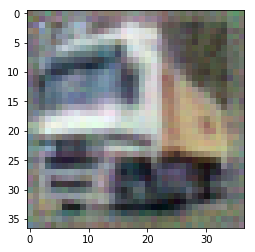

In [12]:
            
theImage =  (output_image - np.amin(output_image))/(np.amax(output_image) - np.amin(output_image))

newImage = np.squeeze(theImage)

plt.imshow(newImage[11:48,11:48,:])

In [14]:
ADMMweights = model.layers[1].get_weights()

In [16]:
inputLayer3 = tensorflow.keras.Input(shape=(32,32,3))
filterOutput = tf.keras.layers.Conv2D(filters = 32,kernel_size=(5,5),strides=(1,1),padding="VALID",kernel_initializer=tf.initializers.constant(value=ADMMweights[0],verify_shape=True))(inputLayer3)
imposterInput = tf.keras.layers.Conv2DTranspose(filters=3,kernel_size=(5,5),strides=(1,1),padding="VALID",kernel_initializer=tf.initializers.constant(value=ADMMweights[0],verify_shape=True))(filterOutput)
model3 = Model(inputs=inputLayer3,outputs=imposterInput)

(1, 32, 32, 3)
(1, 32, 32, 3)


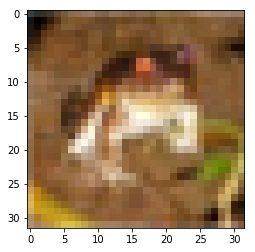

In [17]:
input_image = np.reshape(x_input[0],(1,32,32,3))
print(input_image.shape)
output_image = model3.predict(input_image)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

theImage = (input_image - np.amin(input_image))/(np.amax(input_image) - np.amin(input_image))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)


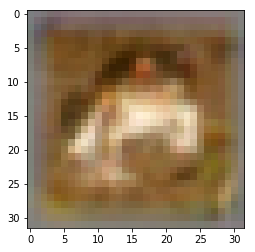

In [18]:
            
theImage =  (output_image - np.amin(output_image))/(np.amax(output_image) - np.amin(output_image))

newImage = np.squeeze(theImage)

plt.imshow(newImage)

(1, 32, 32, 3)
(1, 32, 32, 3)


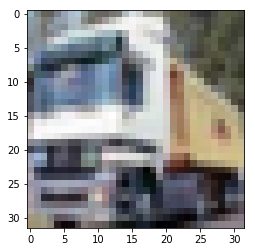

In [19]:
input_image = np.reshape(x_input[1],(1,32,32,3))
print(input_image.shape)
output_image = model3.predict(input_image)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

theImage = (input_image - np.amin(input_image))/(np.amax(input_image) - np.amin(input_image))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)


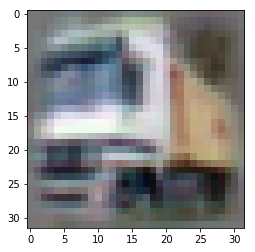

In [20]:
            
theImage =  (output_image - np.amin(output_image))/(np.amax(output_image) - np.amin(output_image))

newImage = np.squeeze(theImage)

plt.imshow(newImage)

In [10]:
print(model.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fef53ad1400>, <z_update_layer.multilayerADMMsparseCodingTightFrame object at 0x7fefe46228d0>, <tensorflow.python.keras.layers.convolutional.Cropping2D object at 0x7fefe46229b0>]


In [9]:
len(ADMMweights)

1

In [16]:
import importlib
importlib.reload(z_update_layer)

<module 'z_update_layer' from '/disk/halen1/richertlr/summer2019/MultiLayerSparseCoding-Python/z_update_layer.py'>

In [22]:
inputLayer2 = tensorflow.keras.Input(shape=(1,1,x.get_shape().as_list()[3]))

In [25]:
effFilter = z_update_layer.visualizeMultilayerADMM(ADMMweights,[[2,2]])(inputLayer2)

In [26]:
model2 = Model(inputs=inputLayer2,outputs=effFilter)

In [28]:
myNode = np.zeros((1,1,1,32))
myNode[0] = 1
visual0 = model2.predict(myNode)


In [29]:
print(np.amax(visual0))
print(np.amin(visual0))

0.18471439
-0.2833781


(1, 14, 14, 3)


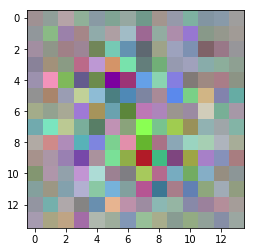

In [30]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

theImage = (visual0 - np.amin(visual0))/(np.amax(visual0) - np.amin(visual0))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)

In [35]:
myNode = np.zeros((1,1,1,32))
myNode[0][0][0][3] = 1
visual3 = model2.predict(myNode)

(1, 14, 14, 3)


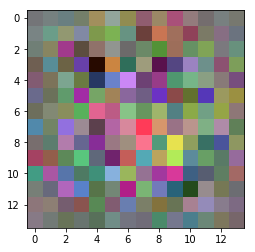

In [36]:
theImage = (visual3 - np.amin(visual3))/(np.amax(visual3) - np.amin(visual3))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)

In [19]:
ADMMweights[0].shape

(5, 5, 3, 32)

In [20]:
ADMMweights[1].shape

(5, 5, 32, 32)

In [11]:
print(model.layers[1].weights[0])

<tf.Variable 'multilayer_adm_msparse_coding_tight_frame/ADMM_convolutional_weights0:0' shape=(5, 5, 3, 32) dtype=float32>


In [12]:
print(model.layers[1].weights[1])

<tf.Variable 'multilayer_adm_msparse_coding_tight_frame/ADMM_convolutional_weights1:0' shape=(5, 5, 32, 32) dtype=float32>


In [ ]:
t = model.layers[1].get_weights()[]

In [9]:
np.sum(np.power(t,2))

8.697397

In [13]:
t2 = model.layers[1].get_weights()[1]
np.sum(np.power(t2,2))

30.360626

In [9]:
#sgd = tf.keras.optimizers.SGD(lr=0.0001, decay=0.000125, momentum=0.5, nesterov=True)
#model.compile(optimizer='sgd', loss='categorical_crossentropy')
#model.fit(x_input, labels, epochs=16, batch_size=32, validation_data=(x_val,labels_val))

Train on 10000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/16
10000/10000 [==============================] - 3037s 304ms/sample - loss: 14.4638 - val_loss: 14.5047
Epoch 2/16
10000/10000 [==============================] - 3055s 306ms/sample - loss: 14.5047 - val_loss: 14.5047
Epoch 3/16
10000/10000 [==============================] - 3043s 304ms/sample - loss: 14.5047 - val_loss: 14.5047
Epoch 4/16
 9984/10000 [============================>.] - ETA: 2s - loss: 14.5069

KeyboardInterrupt: 

In [16]:
5*5*3*32/(5*5*np.sqrt(3*32))

9.797958971132713

In [17]:
5*5*32*32/(5*5*32)

32.0

In [8]:
a = tensorflow.constant([1,2,3])

NameError: name 'tensorflow' is not defined

In [9]:
import tensorflow
a = tensorflow.constant([1,2,3])

In [12]:
sess = Session()
sess.run(a*2)

array([2, 4, 6], dtype=int32)

In [18]:
sum([1,2])

3

In [13]:
a = np.array([[1,2,3,4,5],[2,34,5,6,7]])
a.shape[0]

2